In [ ]:
from typing import *

In [ ]:

# Difficulty = MEDIUM
def combinationSum4(nums: List[int], target: int) -> int:
    dp = {0: 1}

    for total in range(1, target + 1):
        dp[total] = 0
        for n in nums:
            dp[total] += dp.get(total -n, 0)

    return dp[target]

* Merge sort: O(n log n)
* Quick sort: O(n log n) on average, O(n^2) in the worst case
* Heap sort: O(n log n)
* Bubble sort: O(n^2)
* Insertion sort: O(n^2)
* Selection sort: O(n^2)

In [ ]:
class LargerNumKey(str):
    def __lt__(x, y):
        # Compare x+y with y+x in reverse order to get descending order
        return x+y > y+x

def largestNumber(nums: List[int]) -> str:
    # Convert the list of numbers to list of strings
    nums = [str(num) for num in nums]

    # Sort the list of strings using our custom sorting function
    nums.sort(key=LargerNumKey)

    # Join the sorted list of strings to form the final result
    largest_num = ''.join(nums)

    # If the largest number is 0, return "0"
    # Otherwise, return the largest number
    return "0" if largest_num[0] == "0" else largest_num

largestNumber([3,30,34,5,9])


'9534330'

In [ ]:
import heapq
def topKFrequent(self, nums: List[int], k: int) -> List[int]:
    # freq_counter = Counter(nums)
    # return sorted(freq_counter, key=freq_counter.get, reverse=True)[:k]



    # Count frequencies
    freq = {}
    for num in nums: # O(n)
        freq[num] = freq.get(num, 0) + 1

    # Create a max heap using frequency as the key
    heap = []
    for num, freq in freq.items(): #O(n)
        heapq.heappush(heap, (-freq, num)) # -ve in freq changes a min heap to max heap, default heap is minHeap

    # Extract top k elements
    result = []
    for _ in range(k): #O(klogn)
        _, num = heapq.heappop(heap)
        result.append(num)

    # overall O(n) + O(n) + O(klogn) = O(n + klogn) bettern than O(nlogn) because k is always less than n
    return result


## [215](https://leetcode.com/problems/kth-largest-element-in-an-array/description/)
Solve it without sorting

In [ ]:
import heapq
def findKthLargest(nums: List[int], k: int) -> int:
    # by sorting its very easy.
    # Either use sorted or heapsort --> TC O(nlogn)
    # h = []
    # for val in nums:
    #     heapq.heappush(h, -val)
    # for i in range(len(h)):
    #     if i == k-1:
    #         return -heapq.heappop(h)
    #     else:
    #         heapq.heappop(h)
    # heap is used to maintain the order of elements in a
    # a specific order. Its not sorting
    heap = nums[:k]
    # The reason only k elements are heapified in the solution
    # to find the kth largest element is to optimize
    # the algorithm's time complexity.
    heapq.heapify(heap)

    for num in nums[k:]:
        if num > heap[0]:
            heapq.heappop(heap)
            heapq.heappush(heap, num) # will

    return heap[0]



findKthLargest([3,2,1,5,6,4], k = 3)



4

[230](https://leetcode.com/problems/kth-smallest-element-in-a-bst/description/)
 Kth Smallest Element in a BST

Given the root of a binary search tree, and an integer k, return the kth smallest value (1-indexed) of all the values of the nodes in the tree.

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
import heapq
def kthSmallest(root, k: int) -> int:
    heap = []

    def dfs(node):
        if not node:
            return

        heapq.heappush(heap, node.val)
        dfs(node.left)
        dfs(node.right)

    dfs(root)
    # result = []
    for _ in range(k-1): #O(klogn)
        heapq.heappop(heap)
    return heap[0]


In [ ]:
h = [4,5,8,2]
heapq.heapify(h)
heapq.heappush(h, 3)
h

[2, 3, 8, 5, 4]

In [ ]:


class KthLargest2(object):

    def __init__(self, k, nums):
        self.k = k
        self.nums = nums
        heapq.heapify(self.nums)  # Convert nums into a heap
        # If the heap is larger than k, remove the smallest elements until it has exactly k elements
        while len(self.nums) > k:
            heapq.heappop(self.nums)

    def add(self, val):
        heapq.heappush(self.nums, val)
        # If after adding the new value, the heap has more than k elements, pop the smallest
        if len(self.nums) > self.k:
            heapq.heappop(self.nums)
        # The smallest element in the heap is now the k-th largest element
        return self.nums[0]

func = ["KthLargest", "add", "add", "add", "add", "add"]
arggs = [[3, [4, 5, 8, 2]], [3], [5], [10], [9], [4]]

for id, i in enumerate(func):
    if i == "KthLargest":
        k_obj = KthLargest2(arggs[id][0], arggs[id][1])

    if id>0 and i == "add":
        print(k_obj.add(arggs[id][0]))

4
5
5
8
8


[366](https://algo.monster/liteproblems/366)

<img src=https://assets.leetcode.com/uploads/2021/03/16/remleaves-tree.jpg>

Given the root of a binary tree, collect a tree's nodes as if you were doing this:

* Collect all the leaf nodes.
* Remove all the leaf nodes.
* Repeat until the tree is empty.
Input: root = [1,2,3,4,5]

Output: [[4,5,3],[2],[1]]

Explanation:
[[3,5,4],[2],[1]] and [[3,4,5],[2],[1]] are also considered correct answers since per each level it does not matter the order on which elements are returned.

Example 2:

Input: root = [1] Output: [[1]]

In [ ]:

tree = [1,2,3,4,5]

class TreeNode:
    def __init__(self, val=None,left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class BinaryTree:
    def __init__(self):
        self.root = None
        self._num_of_elements = 0

    def __repr__(self):
        return self._print_recursive(self.root)

    def _print_recursive(self, node):
      # pre-order traversal will print value of a node first and all its
      # left nodes and then its all right node of a node
        if node is None:
            return "None"
        else:
            return f"{node.val},{self._print_recursive(node.left)}, {self._print_recursive(node.right)}"
    def insert(self, val):
        if val:
            self.root = self._insert_recursive(self.root, val)

    def _insert_recursive(self, node, val):
        if node is None:
            self._num_of_elements += 1
            return TreeNode(val)
        if val <= node.val:
            node.left = self._insert_recursive(node.left, val)
        else:
            node.right = self._insert_recursive(node.right, val)
        return node
t = BinaryTree()
for i in tree:
    t.insert(i)
print(t)


1,None, 2,None, 3,None, 4,None, 5,None, None


In [ ]:
from collections import deque
def findLeaves(root: Optional[TreeNode]) -> List[List[int]]:
    """
    Logic: Collects the nodes of a binary tree level by level.

    Args:
        root: The root node of the binary tree.

    Returns:
        A list of lists, where each inner list represents a level of the tree.
    """

    if not root:
        return []

    queue = deque([root])
    result = []

    while queue:
        level_nodes = []
        for _ in range(len(queue)):
            node = queue.popleft()
            level_nodes.append(node.val)
            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)
        result.append(level_nodes)

    return result

findLeaves(t.root)

[[1], [2], [3], [4], [5]]

In [ ]:
def complexNumberMultiply(num1: str, num2: str) -> str:
        a1,b1 = num1.split('+')
        a1 = int(a1)
        b1 = int(b1[:-1])
        a2,b2 = num2.split('+')
        a2 = int(a2)
        b2 = int(b2[:-1])
        return str(a1*a2 + b1*b2*(-1)) + '+' + str(a1*b2 + a2*b1) + 'i'

complexNumberMultiply(num1 = "1+-1i", num2 = "1+-1i")

'0+-2i'

In [ ]:
def complexNumberMultiply( num1: str, num2: str) -> str:

        num1 = num1.replace("i", "j").replace("+-", "-")
        num2 = num2.replace("i", "j").replace("+-", "-")

        num1 = complex(num1)
        num2 = complex(num2)


        #z = eval(f"({num1}) * ({num2})")
        z = num1 * num2
        z = f"{int(z.real)}+{int(z.imag)}i"
        return z
complexNumberMultiply(num1 = "1+-1i", num2 = "1+-1i")

'0+-2i'

Right Shift (>>)

Purpose: Divides the number by 2^n, where n is the number of positions shifted.
Effect: Shifts all bits to the right, discarding the least significant bit.

Left Shift (<<)

Purpose: Multiplies the number by 2^n, where n is the number of positions shifted.
Effect: Shifts all bits to the left, filling the least significant bits with 0.


In [ ]:
bin(3)

'0b11'

In [ ]:
3>>1

1

In [ ]:
3 & 1 # 011  &001

1

In [ ]:
16 >> 2

4

In [ ]:
(5>>1) + (5&1)

3

[338](https://leetcode.com/problems/counting-bits/description/)

Given an integer n, return an array ans of length n + 1 such that for each i (0 <= i <= n), ans[i] is the number of 1's in the binary representation of i.



Example 1:

Input: n = 2
Output: [0,1,1]
Explanation:
0 --> 0
1 --> 1
2 --> 10

In [ ]:
def countBits(n: int) -> List[int]:
    digits = [0]
    for i in range(1, n + 1):
        digits.append(digits[i >> 1] + (i & 1))
    return digits

In [ ]:
def sum_elements_with_k_set_bits(nums, k):
    """
    Calculates the sum of elements in nums whose corresponding indices have exactly k set bits.

    Args:
        nums: The input array of integers.
        k: The desired number of set bits in the indices.

    Returns:
        The sum of elements whose indices have k set bits.
    """

    def count_set_bits(num):
        """
        Counts the number of set bits in a given integer.

        Args:
            num: The integer to count the set bits of.

        Returns:
            The number of set bits in the integer.
        """

        count = 0
        while num:
            count += num & 1
            num >>= 1
        return count

    result = 0
    for i, num in enumerate(nums):
        if count_set_bits(i) == k:
            result += num
    return result
sum_elements_with_k_set_bits([5,10,1,5,2], k = 1)


13

In [ ]:
t1 = TreeNode(1)
t1.left = TreeNode(2)
t1.right = TreeNode(3)
t1.left.left = TreeNode(4)
t1.right.left = TreeNode(6)
t1.left.right = TreeNode(5,7,8)

ref = TreeNode(1,3,2)
ref.left = TreeNode(3)
ref.right = TreeNode(2)
ref.left.right = TreeNode(6)
ref.right.left = TreeNode(4)
ref.left.right = TreeNode(5,8,7)

### [951](https://leetcode.com/problems/flip-equivalent-binary-trees/description/)
For a binary tree T, we can define a flip operation as follows: choose any node, and swap the left and right child subtrees.

A binary tree X is flip equivalent to a binary tree Y if and only if we can make X equal to Y after some number of flip operations.

Given the roots of two binary trees root1 and root2, return true if the two trees are flip equivalent or false otherwise.



In [ ]:
# check in leetcode
def flipEquiv(t1: Optional[TreeNode],
              ref: Optional[TreeNode]) -> bool:
    if not t1 or not ref:
        return not t1 and not ref


    if t1.val != ref.val:
        return False
    # we need to check left and right subtree are equal if not then we need to flip and check
    org = flipEquiv(t1.left, ref.left) and flipEquiv(t1.right, ref.right)

    # now flip and check if the trees are flip equivalent
    flip = flipEquiv(t1.left, ref.right) and flipEquiv(t1.right, ref.left)
    return org or  flip

flipEquiv(t1, ref)

False

In [ ]:
class Solution:
    def twoSumBSTs(self, root1: Optional[TreeNode], root2: Optional[TreeNode], target: int) -> bool:
        # Helper function to perform in-order traversal and store the values
        def in_order_traversal(root: Optional[TreeNode], index: int):
            if not root:
                return
            in_order_traversal(root.left, index)  # Traverse left subtree
            values[index].append(root.val)  # Store the node value
            in_order_traversal(root.right, index)  # Traverse right subtree

        # Initialize list to hold values from both trees
        values = [[], []]
        # Fill the values list with values from both trees using in-order traversal
        in_order_traversal(root1, 0)
        in_order_traversal(root2, 1)

        # Initialize pointers
        left_index, right_index = 0, len(values[1]) - 1

        # Use a two-pointer approach to find two elements that sum up to target
        while left_index < len(values[0]) and right_index >= 0:
            current_sum = values[0][left_index] + values[1][right_index]
            if current_sum == target:
                return True  # Found the elements that sum to target
            if current_sum < target:
                left_index += 1  # Move the left pointer rightward
            else:
                right_index -= 1  # Move the right pointer leftward

        # Return False if no pair is found that adds up to target
        return False

[interval intersection](https://leetcode.com/problems/interval-list-intersections/)

In [ ]:
def intervalIntersection(firstList: List[List[int]], secondList: List[List[int]]) -> List[List[int]]:
    res = []
    # my solution

    # res = []
    # l1 = 0
    # l2 = 0

    # while l1 < len(firstList) and l2 < len(secondList):
    #     if firstList[l1][1] >= secondList[l2][0] and firstList[l1][0] <= secondList[l2][1]:
    #         # Intersection happened
    #         res.append([max(firstList[l1][0], secondList[l2][0]), min(firstList[l1][1], secondList[l2][1])])

    #     if firstList[l1][1] < secondList[l2][1]:
    #         l1 += 1
    #     else:
    #         l2 += 1

    # return res

    # optimized solution
    for el in secondList:
        firstList.append(el)

    firstList.sort()
    prev = -1

    for x,y in firstList:
        if prev >= x:
            res.append([x,min(y,prev)])
        prev = max(y,prev)

    return res



intervalIntersection([[0,2],[5,10],[13,23],[24,25]], [[1,5],[8,12],[15,24],[25,26]])


[[1, 2], [5, 5], [8, 10], [15, 23], [24, 24], [25, 25]]

[791. Custom Sort String](https://leetcode.com/problems/custom-sort-string/description/)

In [ ]:

def customSortString(order: str, s: str) -> str:
    result = ""
    mp = {}
    for char in s:
        mp[char] = mp.get(char, 0) + 1
    for char in order:
        if char in mp:
            result += char * mp[char]
            del mp[char]
    for char, count in mp.items():
        result += char * count
    return result

customSortString("kqep", "pekeq")

'kqeep'

In [ ]:
import heapq
def kClosest(points: List[List[int]], k: int) -> List[List[int]]:

    # optimized:
    # points.sort(key=self.euclideanToOrigin);
    # return points[:k];

    # def euclideanToOrigin(self, point):
    #     return math.sqrt(pow(point[0], 2) + pow(point[1], 2));


    heap = []
    # heapq.heapify(heap)
    def distance(x,y):
        return (x*x + y*y)**0.5

    for x,y in points:
        heapq.heappush(heap, (distance(x, y), [x,y]))

    return [heapq.heappop(heap)[1] for i in range(k)]

In [4]:
def longestSubstringMatchingRegex(text, regex):
    max_length = 0
    i = j = 0

    while i < len(text) and j < len(regex):
        if regex[j] == '*':
            while i < len(text) and j < len(regex) - 1 and regex[j + 1] != text[i]:
                i += 1
            j += 1
        elif text[i] == regex[j]:
            i += 1
            j += 1
            max_length = max(max_length, j)
        else:
            i = i - j + 1  # Reset i to the beginning of the potential match
            j = 0

    return max_length

longestSubstringMatchingRegex(text = "aaabaab", regex = "a*a")

3

[K-Length Substring with No Repeated Chaaracters](https://leetcode.ca/all/1100.html)

Input: S = "havefunonleetcode", K = 5  
Output: 6  
Explanation:   
There are 6 substrings they are : 'havef','avefu','vefun','efuno','etcod','tcode'.  

In [3]:
def KLengthSubstring_no_repeated_characs(strs, k):
    if len(strs) < k:
        return 0
    

    win_lft_ptrs = 0
    win_rgt_ptrs = k

    res = []
    while win_rgt_ptrs <= len(strs): # this condition is imp to reach to the last char
        sub_str = strs[win_lft_ptrs:win_rgt_ptrs]
        if len(set(sub_str)) == k: # to avoid repeating chars
            res.append(sub_str)
        
        win_lft_ptrs +=1
        win_rgt_ptrs +=1
    return res, len(res)

KLengthSubstring_no_repeated_characs("havefunonleetcode", k = 5)

(['havef', 'avefu', 'vefun', 'efuno', 'etcod', 'tcode'], 6)

[647. Palindromic Substrings](https://leetcode.com/problems/palindromic-substrings/description/)

Example 2:

Input: s = "aaa"  
Output: 6  
Explanation: Six palindromic strings: "a", "a", "a", "aa", "aa", "aaa".  

#### optimized

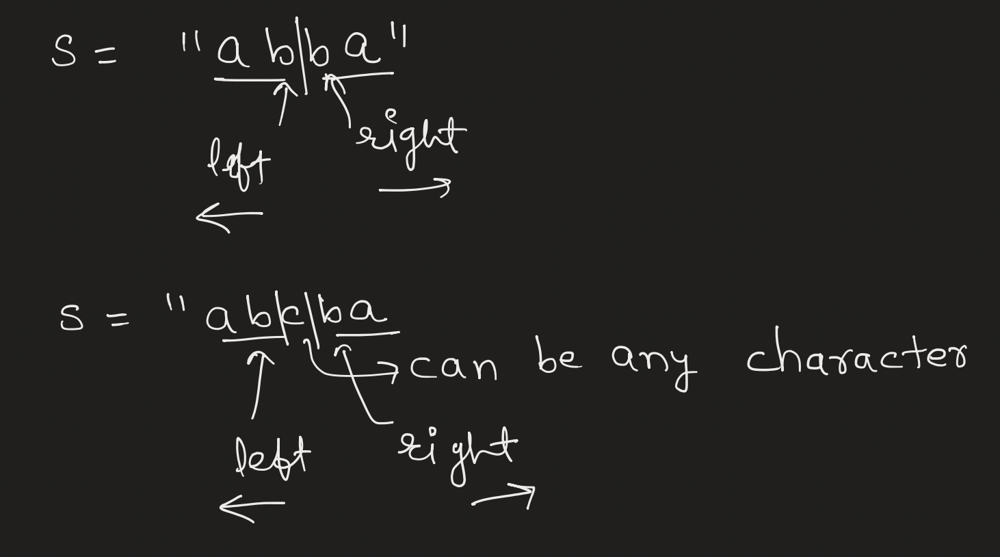

In [38]:
# Brute Force O(n^3)
 
def ispalindrome(s, left, right):
    # if start and end is not equal not palindrome
    # ex : madam, abaaba, abc

    # if more than two elements middle char
    # does have any effect if the string is palidrome
    # Ex: ABA 
    # while left < right: 
    #     if s[left] != s[right]:
    #         return False
    #     left += 1
    #     right -= 1
    # return True
    # if donot want to use indexing use above methods
    if s[left:right+1] == s[left:right+1][::-1]:
        print(s[left:right+1])
        return True
    return False

def count_palindromic_substring(s):
    ans = 0
    n = len(s)

    for i in range(n):
        for j in range(i, n):
            ans+= ispalindrome(s, i, j)

    return ans

# count_palindromic_substring("racecar")

# optimized O(n^2)

def countSubstrings(s: str) -> int:
    n, ans = len(s), 0
    
    def palindromeCount(left: int, right: int) -> int:
        count = 0
        while left >= 0 and right < n and s[left] == s[right]:
            left -= 1
            right += 1
            count += 1
        return count
    
    for i in range(n):
        even = palindromeCount(i, i + 1)
        odd = palindromeCount(i, i)
        ans += even + odd
        
    return ans
countSubstrings("racecar")

4

[Longest Repeating Substring](https://leetcode.ca/all/1062.html)

Input: "aabcaabdaab"  
Output: 3  
Explanation: The longest repeating substring is "aab", which occurs 3 times.

In [20]:
# Repeat means occurence more than once, less than once is not repeating
def longest_repeating_substring(strs):
    seen = {}
    max_len = 0
    for i in range(len(strs)):
        for j in range(i+1,len(strs)):
            sub = strs[i:j+1]

            # check len of the substrings that are repeated more than
            if sub in seen:
                if max_len < len(sub):
                    max_len =  len(sub)
            else:
                seen[sub] = 1

    return max_len
longest_repeating_substring("aaaaa")

4

In [24]:
# def longest_substr_with_two_distinct_chars(strs):    

    
#     max_len = 0
#     for i in range(len(strs)):
#         for j in range(i+2,len(strs)):
#             sub = strs[i:j+1]
#             if len(set(sub)) == 2:
#                 if max_len < len(sub):
#                     max_len = len(sub)
    
    

#     return max_len

def longest_substr_with_two_distinct_chars(strs):
    max_len = 0  
    start = 0  #
    char_freq = {}  

    for end in range(len(strs)):
        # Increase the frequency of the current character
        char_freq[strs[end]] = char_freq.get(strs[end], 0) + 1

        # While there are more than two distinct characters in the window:
        while len(char_freq) > 2:
            # Decrease the frequency of the character at the start of the window
            char_freq[strs[start]] -= 1

            # If the frequency becomes 0, remove the character from the dictionary
            if char_freq[strs[start]] == 0:
                del char_freq[strs[start]]

            # Move the start pointer to the right            
            start += 1

        # Update the maximum length if necessary
        max_len = max(max_len, end - start + 1)

    return max_len
longest_substr_with_two_distinct_chars("aabc")

3